# Write a function for a single frame:
* Go around the singularity in a circle of a given radius and plot the value of the phase

* Also make a plot of the circle, like on the right (actually, it would be better to indicate the individual pixels instead of drawing an ideal circle)

* Background: in some systems, the phase jump can be less than 2pi


In [564]:
import numpy as np
import xarray as xr
import holoviews as hv
hv.notebook_extension()
import matplotlib.pyplot as plt

In [565]:
ds = xr.open_dataset("fuw hackathon 2018/data/2017-11-03 mag sequence phase.nc")
hvds = hv.Dataset(ds)
hvds()

:Dataset   [y,x,field]   (Absolute value,Phase)

In [566]:
phases = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Phase"])
fields = phases.dimension_values("field", expanded=False)

# setting flat=False will preserve the matrix shape
data = phases[fields[1]].dimension_values("Phase", flat=False)

In [567]:
def circle_coordinates(coordinates, radius,density=20):
    latitude = coordinates[0] # latitude of circle center, decimal degrees
    longitude = coordinates[1]
    x,y=[],[]
    for k in range(density+1):
        a = np.pi*2*k/density
        dx = radius * np.cos(a) + latitude
        dy = radius * np.sin(a) + longitude
        x.append(dx)
        y.append(dy)
    return x,y


In [568]:
def azimuth(x,y):
    r=np.zeros(len(x))
    for i in range(len(x)-1):
        if i == len(x):
            X1, X2 = x[i], x[0]
            Y1, Y2 = y[i], y[0]
        else:
            X1, X2 = x[i], x[i+1]
            Y1, Y2 = y[i], y[i+1]
        r[i]=np.arctan2(X2-X1,Y2-Y1)/np.pi
    return r
    

In [569]:
def single_frame(data, vortex = [2,2], radii = [1]):
    '''
    PHASE VS AZIMUTH
    
    Parameters:
    --------------------
    data: phase data
    vortex: x and y coordinates
    radii: radius input of every circle you want
    '''
    

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_aspect('equal')
    im=ax.imshow(data, extent=(-4,4,-4,4))
    phases = {}
    azimuths = {}
    for i in range(len(radii)):
        x,y = circle_coordinates(vortex,radii[i],density=50)
        ax.plot(x,y)#,marker="o")
        phase = [data[int(x[j]+0.5),int(y[j]+0.5)] for j in range(len(x))]
        #az = [azimuth(x[j],y[j],phase[j],radii[i]) for j in range(len(x))]
        az = azimuth(x,y)
        phases.update({str(i):phase})
        azimuths.update({str(i):az})
    
    fig.colorbar(im)
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.show()
    
    
    plt.figure(3)
    
    markers_list = ["<",">","1","2","3","4","8"]
    for i in range(len(phases)):
        plt.plot(azimuths[str(i)],phases[str(i)],label = str(radii[i]) + " $\mu$m", marker=markers_list[i])
    plt.legend()
    plt.ylabel("Phase ($\pi$)",fontsize=18)
    plt.xlabel("Azimuthal angle ($\pi$)",fontsize=18)
    plt.show()

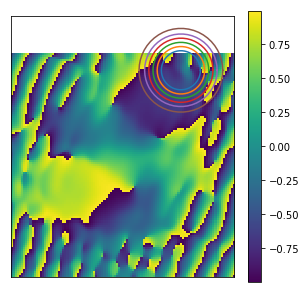

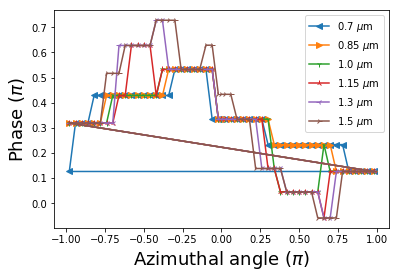

In [570]:
r = [0.70,0.85,1.00,1.15,1.30,1.5]

single_frame(data = data, vortex = [2.1,3.4] ,radii=r)